# Exploring the world of FIFA

The objective of this project is to analyze the SO FIFA 2019 data. The  main goal of this analysis is to get insights and correlations between player values, wage, age, other special attributes and their performance. This way, data can be converted into information by analysing it.

The insghhts identified from our analysis along with the understanding and contextual information enable users to act smartly when pllaying FIFA, picking a better team for their premier league ane/or increase betting odds.

#### Load Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# For missing values
import missingno as mno

# For datetime manipulation
import datetime

# For interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)

#### Load Data

In [17]:
%time
df = pd.read_csv('../data/fifa.csv')

print(df.shape)

Wall time: 0 ns
(18207, 89)


In [18]:
# Column names in data
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [19]:
# Checking first 5 rows and columns
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
# Summmary statistics for numeric data
df.iloc[:, 2:].describe().style.background_gradient(cmap = 'cividis')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [21]:
# Summary statistics for categorical data
columns_to_exclude = ['Name', 'Photo', 'Flag', 'Club Logo', 'Value', 'Wage']
df[df.columns.difference(columns_to_exclude, sort=False)].describe(include='object')

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,17966,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,164,651,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,England,Eintracht Frankfurt,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,1662,33,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


#### Cleaning Data

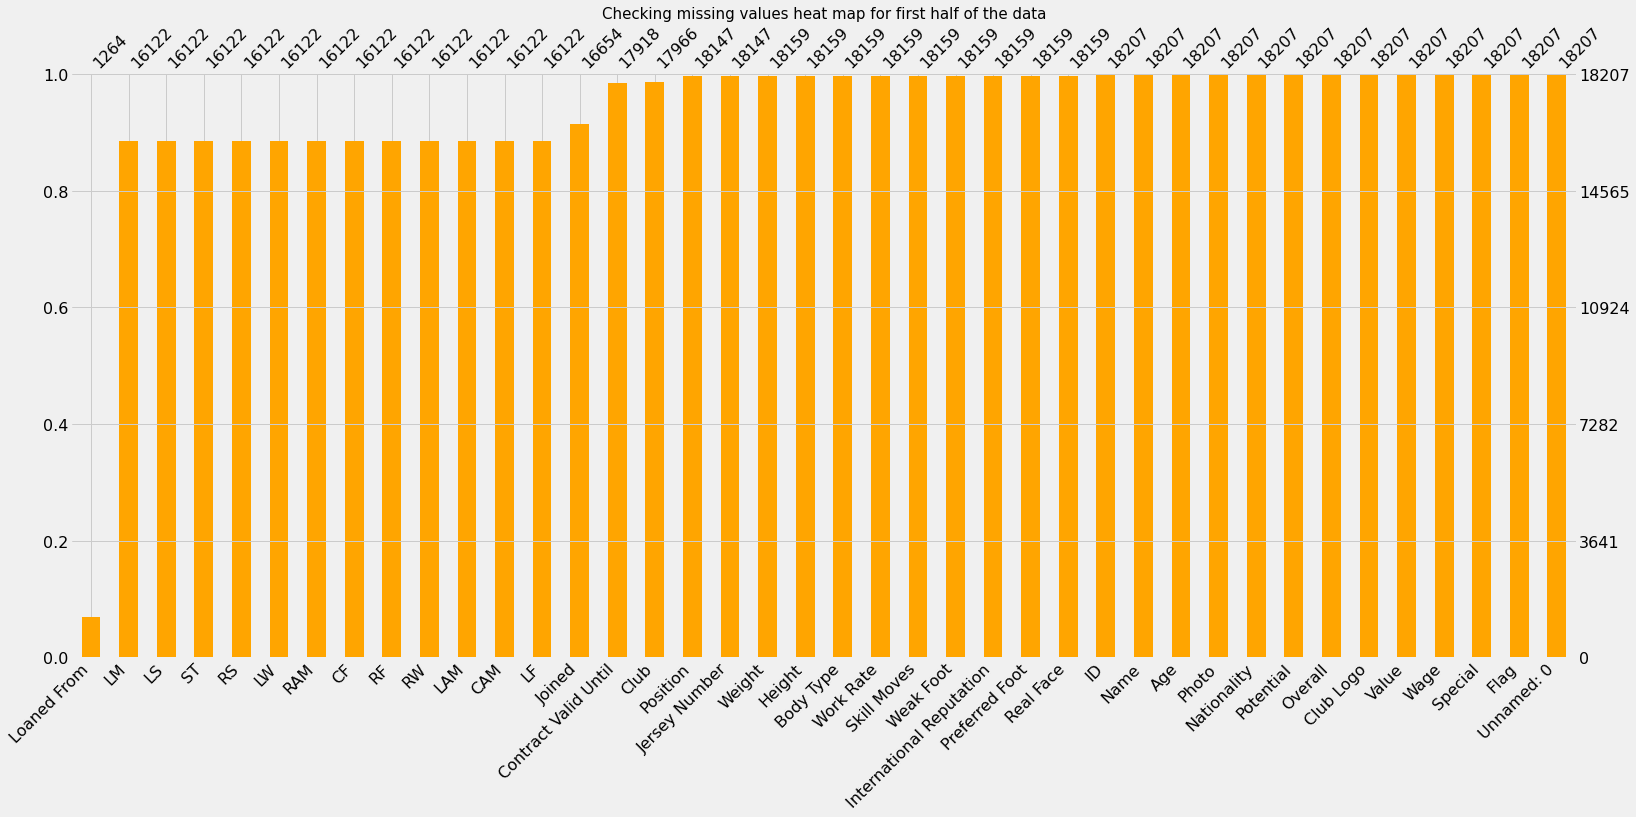

In [22]:
# Finding missing values in first 40 columns using missingno library
mno.bar(df.iloc[:, :40], color='orange', sort='ascending')
plt.title('Checking missing values heat map for first half of the data', fontsize=15)
plt.show()

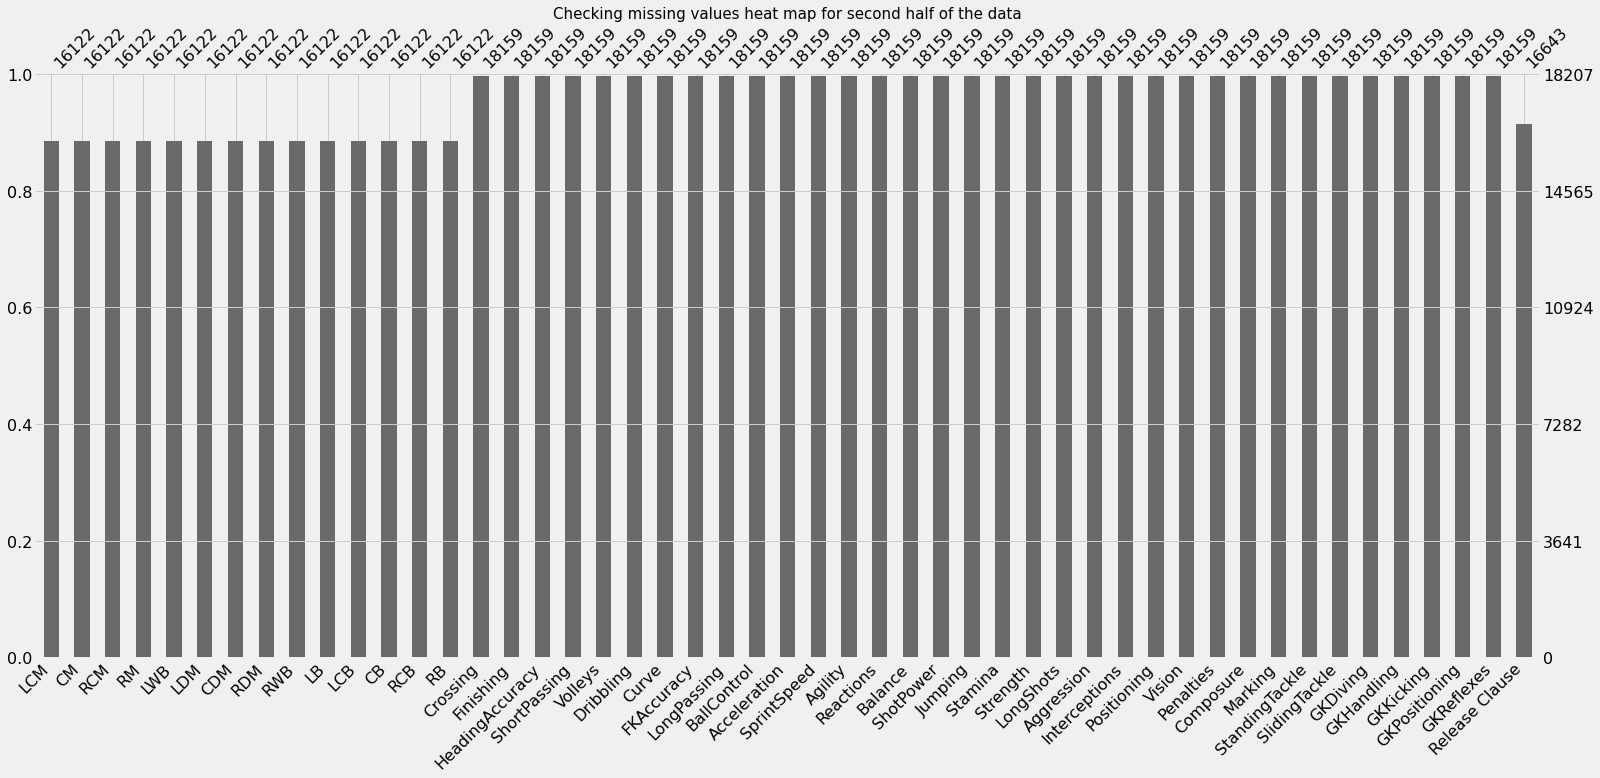

In [23]:
# Finding missing values in second 40 columns using missingno library
mno.bar(df.iloc[:,40:])
plt.title('Checking missing values heat map for second half of the data', fontsize=15)
plt.show()

#### Missing Value Imputation

In [24]:
# # Imputing numeric values with mean
# df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# # Imputing categorical values with mode
# df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [46]:
# filling the missing value for the continous variables for proper df visualization

df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)

df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

df.fillna(0, inplace=True)

In [47]:
# Checking if al null vallues are imputed
df.isnull().sum().sum()

0

### Feature Engineering

In [56]:
# Creating new features by aggregating the features

def defending(data):
    return int(round(data[['Marking', 'StandingTackle', 'SlidingTackle']].mean().mean()))

def general(data):
    return int(round(data[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean().mean()))

def mental(data):
    return int(round(data[['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean().mean()))

def passing(data):
    return int(round(data[['Crossing', 'ShortPassing', 'LongPassing']].mean().mean()))

def mobility(data):
    return int(round(data[['Acceleration', 'SprintSpeed', 'Agility', 'Reactions']].mean().mean()))

def power(data):
    return int(round(data[['Balance', 'Jumping', 'Stamina', 'Strength']].mean().mean()))

def rating(data):
    return int(round(data[['Potential', 'Overall']].mean().mean()))

def shooting(data):
    return int(round(data[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties']].mean().mean()))


In [57]:
# Adding new feautres to data

df['Defending'] = df.apply(defending, axis=1)
df['General'] = df.apply(general, axis=1)
df['Mental'] = df.apply(mental, axis=1)
df['Passing'] = df.apply(passing, axis=1)
df['Mobility'] = df.apply(mobility, axis=1)
df['Power'] = df.apply(power, axis=1)
df['Rating'] = df.apply(rating, axis=1)
df['Shooting'] = df.apply(shooting, axis=1)

In [58]:
# Checking column names after adding new columns

df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### Visualization

d:\biju\python_environments\test_venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\biju\python_environments\test_venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\biju\python_environments\test_venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

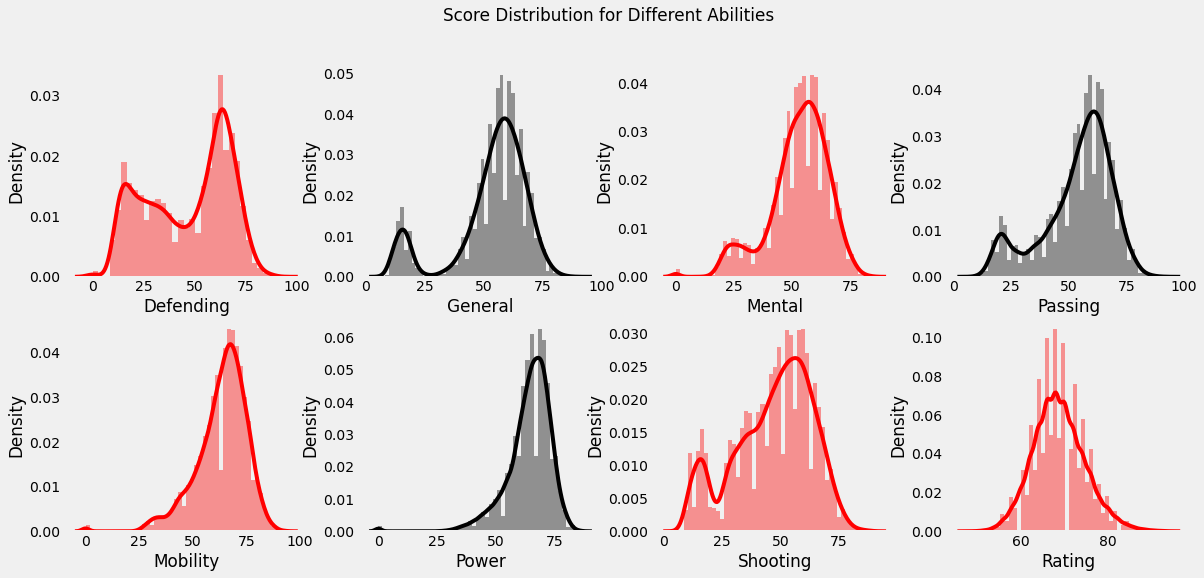

In [61]:
# Distribution of scores of different skills

plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(2, 4, 1)
sns.distplot(df['Defending'], color='red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(df['General'], color='black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(df['Mental'], color='red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(df['Passing'], color='black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(df['Mobility'], color='red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(df['Power'], color='black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(df['Shooting'], color='red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(df['Rating'], color='red')
plt.grid()

plt.suptitle('Score Distribution for Different Abilities')
plt.show()

d:\biju\python_environments\test_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


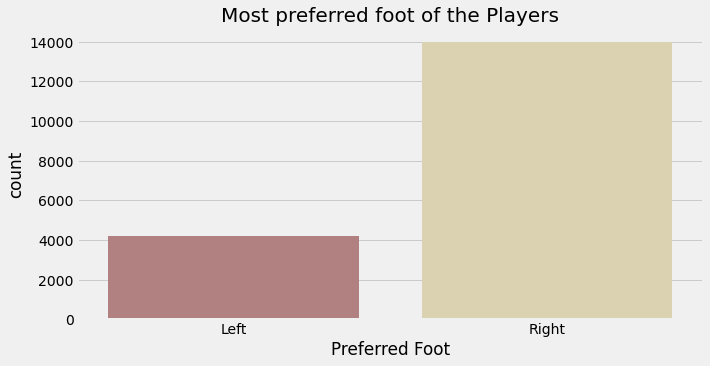

In [62]:
# Most preferred foot for the player

# plt.rcParams['figure.figsize'] = (10, 5)
plt.figure(figsize=(10, 5))
sns.countplot(df['Preferred Foot'], palette='pink')
plt.title('Most preferred foot of the Players', fontsize=20)
plt.show()

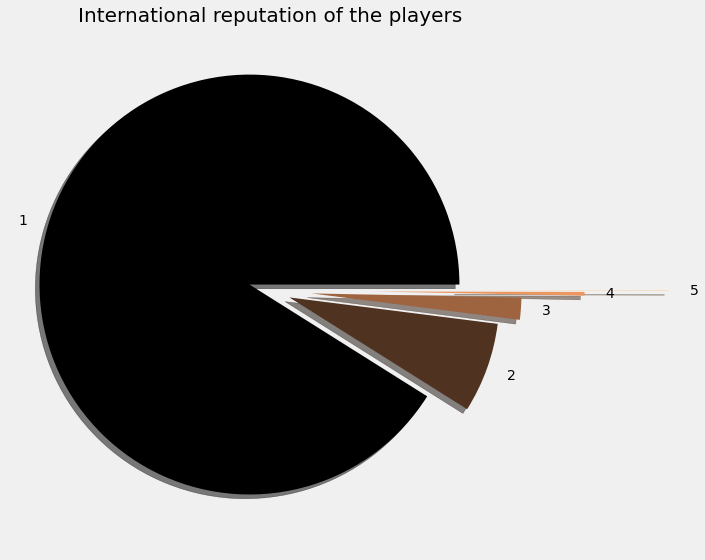

In [63]:
# Share of International reputation

labels = ['1', '2', '3', '4', '5']
sizes = df['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.figure(figsize=(9, 9))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True)
plt.title('International reputation of the players', fontsize=20)
plt.show()

In [66]:
# Cheking all players with 5 star international reputation rating

df[df['International Reputation']==5][['Name', 'Nationality', 
                                       'Overall']].sort_values('Overall', 
                                                               ascending=False).style.background_gradient(cmap='magma')

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


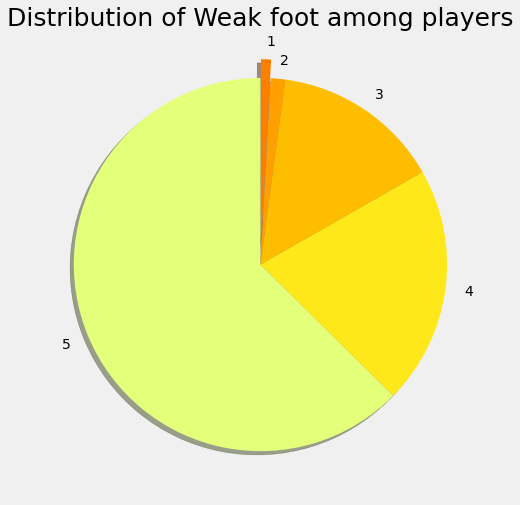

In [70]:
# Distribution of Weak foot players

labels = ['5', '4', '3', '2', '1']
size = df['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Distribution of Weak foot among players', fontsize=25)
plt.show()

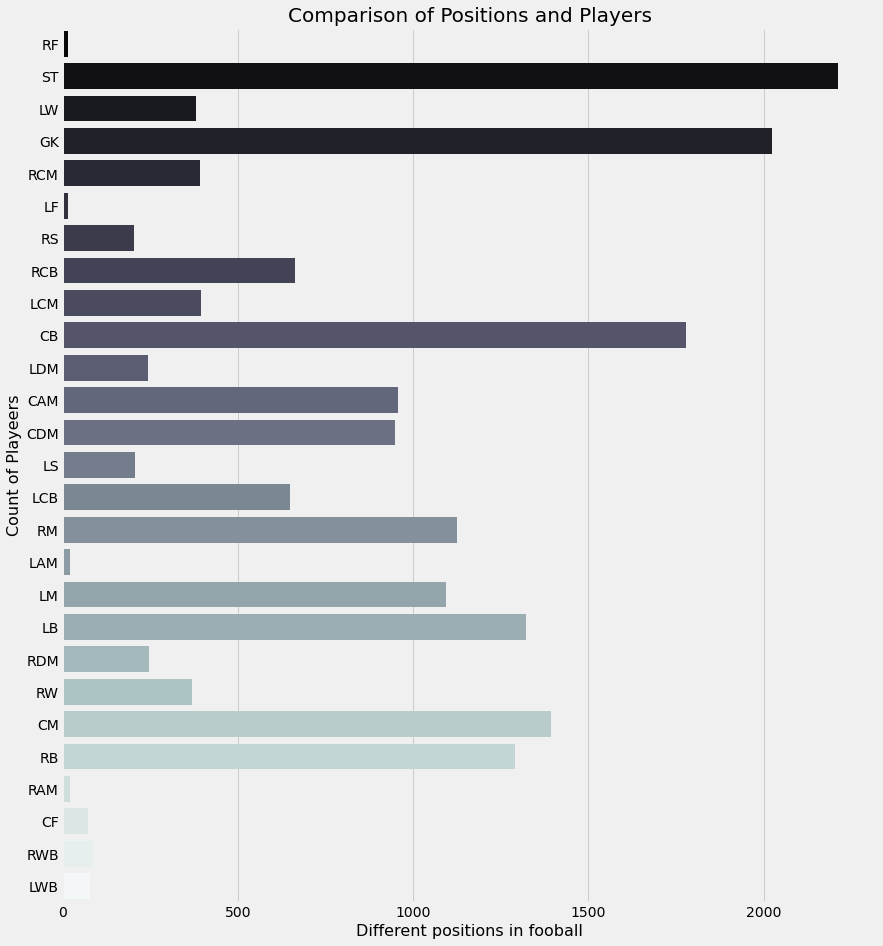

In [71]:
# Comparisos between players and positions

plt.figure(figsize=(13, 15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y='Position', data=df, palette='bone')
ax.set_xlabel(xlabel='Different positions in fooball', fontsize=16)
ax.set_ylabel(ylabel='Count of Players', fontsize=16)
ax.set_title(label='Comparison of Positions and Players', fontsize=20)
plt.show()

d:\biju\python_environments\test_venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


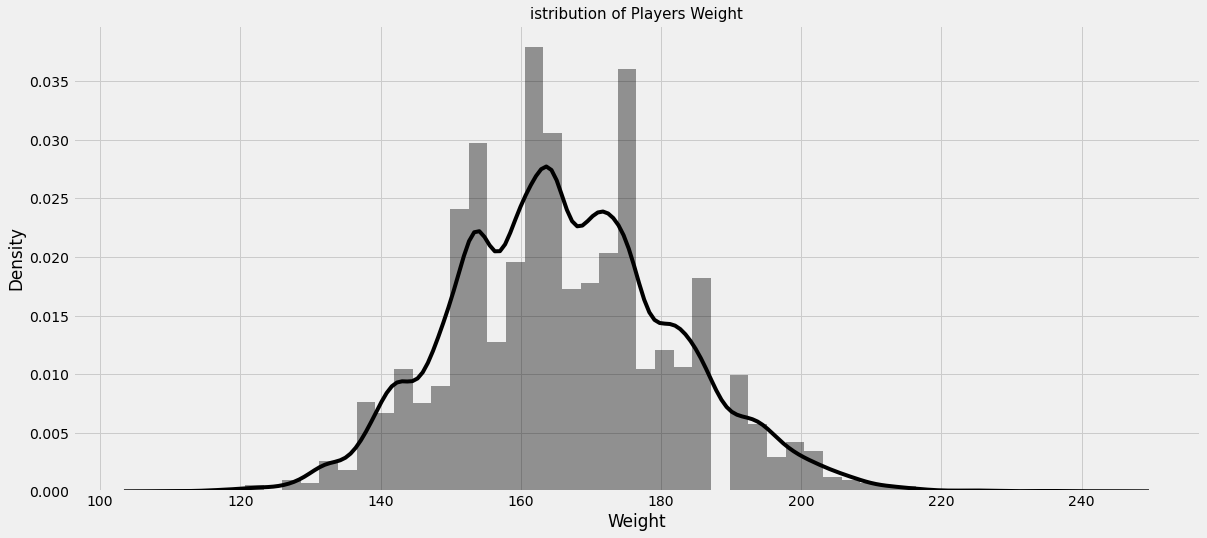

In [72]:
# Distribution of players weight

# Function for cleaning weight data
def extract_value_from_wight(value):
    return float(value.replace('lbs', ''))

# Applying functoin to weight column
df['Weight'] = df['Weight'].apply(lambda x: extract_value_from_wight(x))

# Plotting
sns.distplot(df['Weight'], color='black')
plt.title('istribution of Players Weight', fontsize=15)
plt.show()

In [77]:
# Distribution of values and wages of players

def extract_value(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', '')) * 1000000
    elif 'K' in out:
        out = float(out.replace('K', '')) * 10000
    return float(out)

In [78]:
# Apply function

df['Value'] = df['Value'].apply(lambda x: extract_value(x))
df['Wage'] = df['Wage'].apply(lambda x: extract_value(x))

d:\biju\python_environments\test_venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\biju\python_environments\test_venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


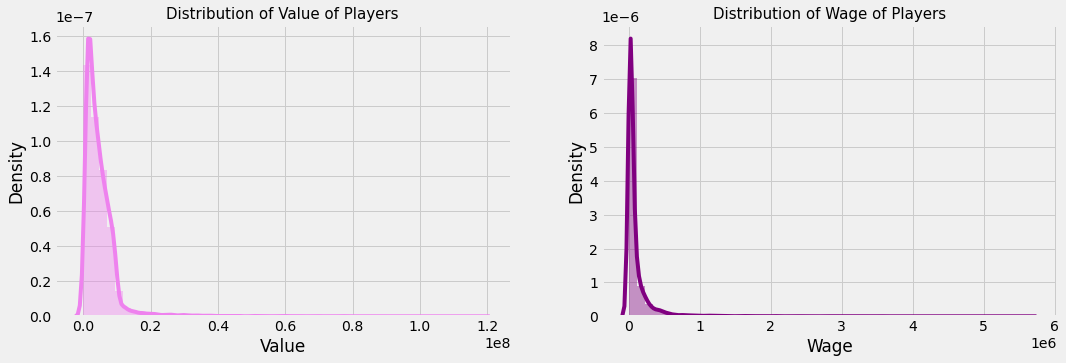

In [79]:
# Plot

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Value'], color='violet')
plt.title('Distribution of Value of Players', fontsize=15)

plt.subplot(1, 2, 2)
sns.distplot(df['Wage'], color='purple')
plt.title('Distribution of Wage of Players', fontsize=15)

plt.show()

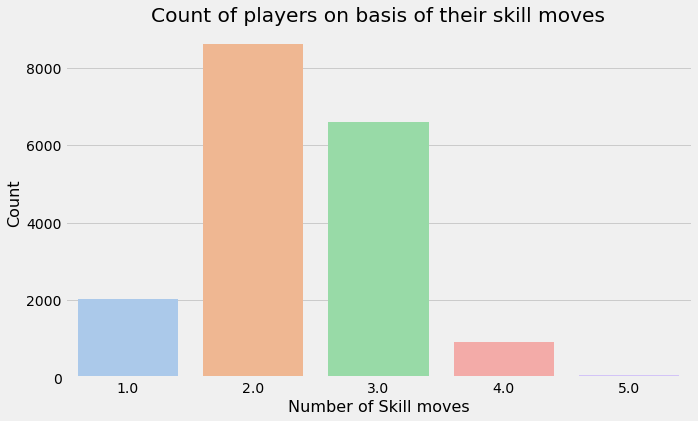

In [80]:
# Skill moves of the players

plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'Skill Moves', data=df, palette='pastel')
ax.set_xlabel(xlabel='Number of Skill moves', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
ax.set_title(label='Count of players on basis of their skill moves')
plt.show()

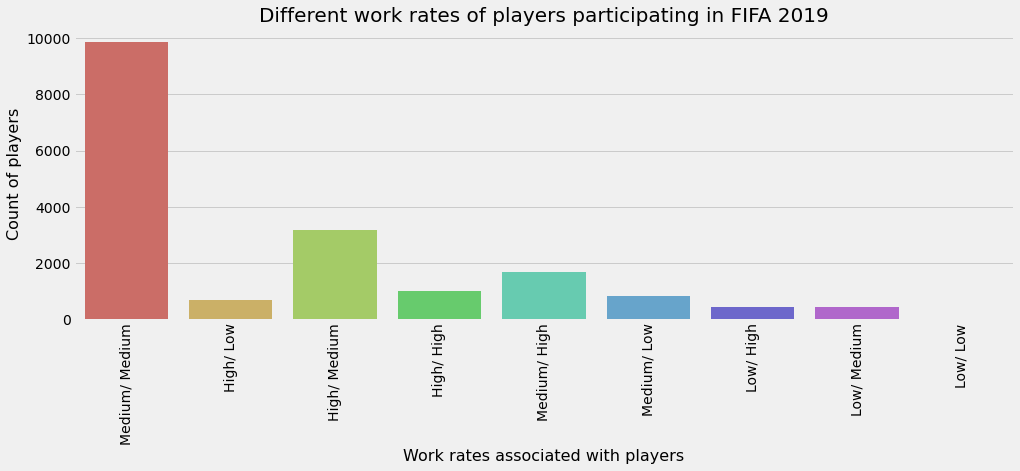

In [83]:
# Different work rate of the players participating in FIFA 2019

plt.figure(figsize=(15, 5))
plt.style.use('fivethirtyeight')

sns.countplot(x='Work Rate', data=df, palette='hls')
plt.title('Different work rates of players participating in FIFA 2019', fontsize=20)
plt.xlabel('Work rates associated with players', fontsize=16)
plt.ylabel('Count of players', fontsize=16)
plt.xticks(rotation=90)
plt.show()

d:\biju\python_environments\test_venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


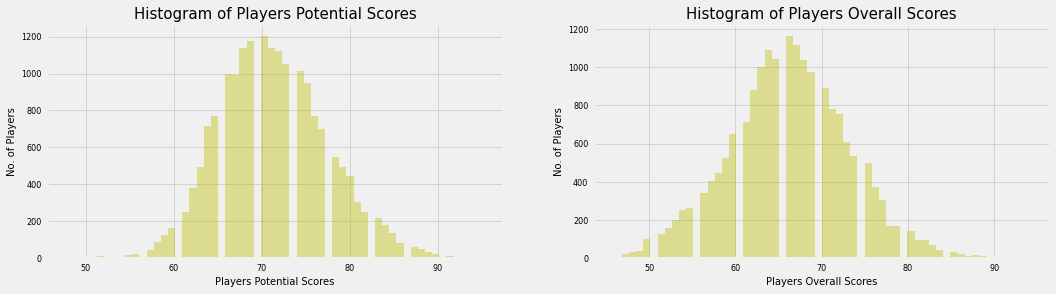

In [86]:
# Players potential and overall scores playing in FIFA 2019
plt.figure(figsize=(16, 4))
plt.style.use('seaborn-paper')

plt.subplot(1, 2, 1)
x = df.Potential
ax = sns.distplot(x, bins=58, kde=False, color='y')
ax.set_xlabel(xlabel='Players Potential Scores', fontsize=10)
ax.set_ylabel(ylabel='No. of Players', fontsize=10)
ax.set_title(label='Histogram of Players Potential Scores', fontsize=15)

plt.subplot(1, 2, 2)
y = df.Overall
ax = sns.distplot(y, bins=58, kde=False, color='y')
ax.set_xlabel(xlabel='Players Overall Scores', fontsize=10)
ax.set_ylabel(ylabel='No. of Players', fontsize=10)
ax.set_title(label='Histogram of Players Overall Scores', fontsize=15)

plt.show()

d:\biju\python_environments\test_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


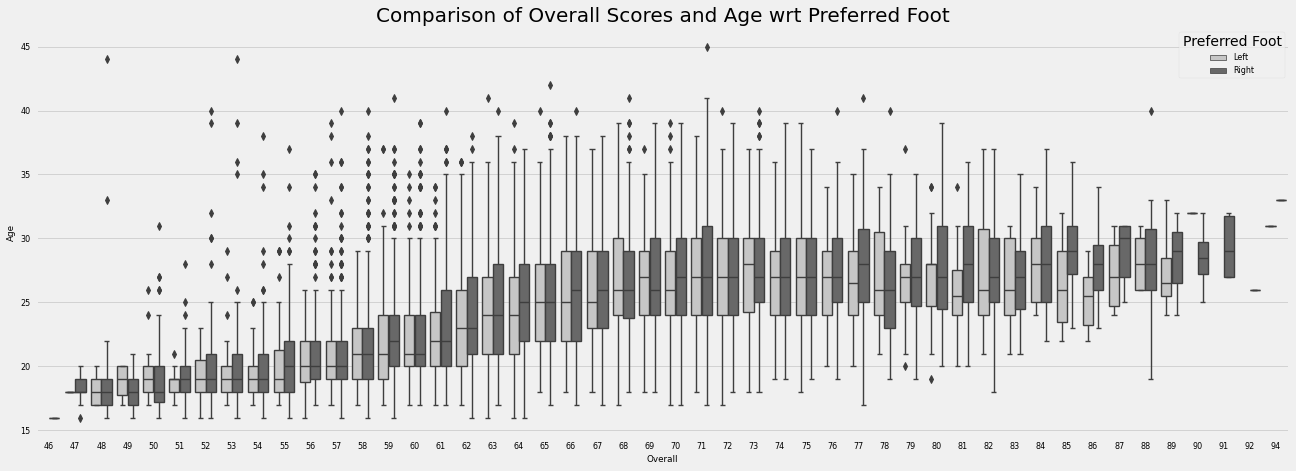

In [87]:
# Overall score vs Age comparison w.r.t the preferred foot

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(df['Overall'], df['Age'], hue=df['Preferred Foot'], palette='Greys')
plt.title('Comparison of Overall Scores and Age wrt Preferred Foot', fontsize=20)
plt.show()


### Countries with Players

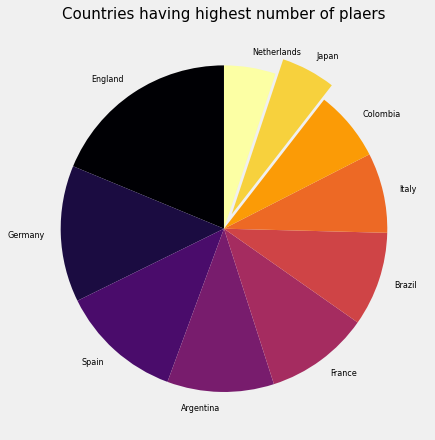

In [88]:
# Counties with highest number of players vs overall scores

df['Nationality'].value_counts().head(10).plot(kind='pie', cmap='inferno', startangle=90, 
                                              explode=[0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having highest number of plaers', fontsize=15)
plt.axis('off')
plt.show()

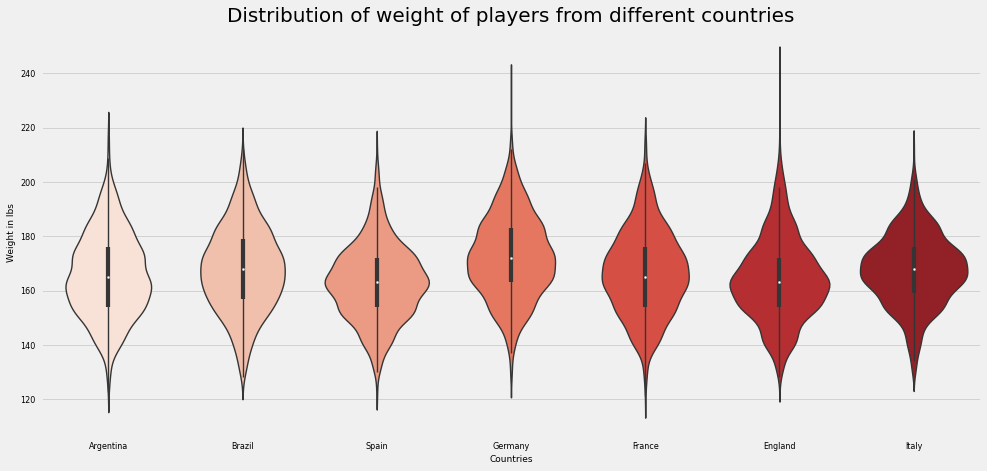

In [92]:
# Players of various Nations vs Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
df_countries = df.loc[df['Nationality'].isin(some_countries) & df['Weight']]

plt.figure(figsize=(15, 7))
ax = sns.violinplot(x=df_countries['Nationality'], y=df_countries['Weight'], palette='Reds')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Weight in lbs', fontsize=9)
ax.set_title(label='Distribution of weight of players from different countries', fontsize=20)
plt.show()

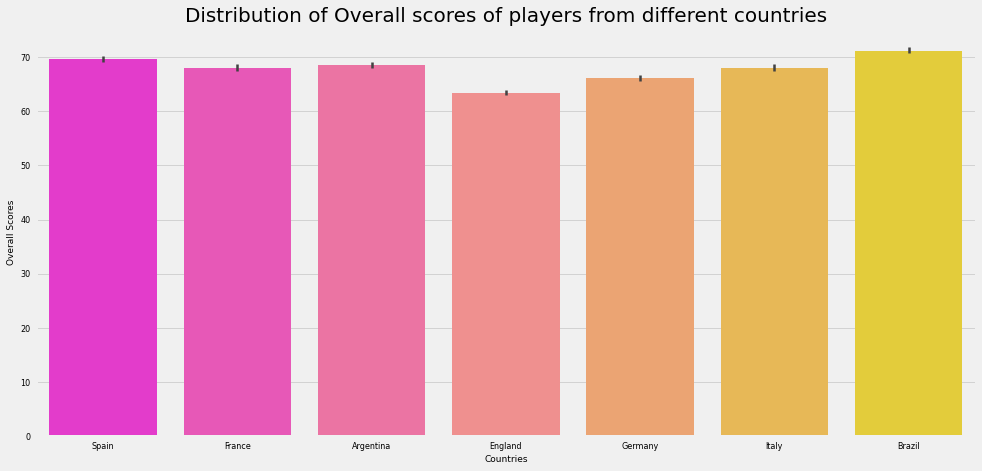

In [101]:
# Players of various Nations vs Overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
df_countries = df.loc[df['Nationality'].isin(some_countries) & df['Overall']]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df_countries['Nationality'], y=df_countries['Overall'], palette='spring')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Overall Scores', fontsize=9)
ax.set_title(label='Distribution of Overall scores of players from different countries', fontsize=20)
plt.show()

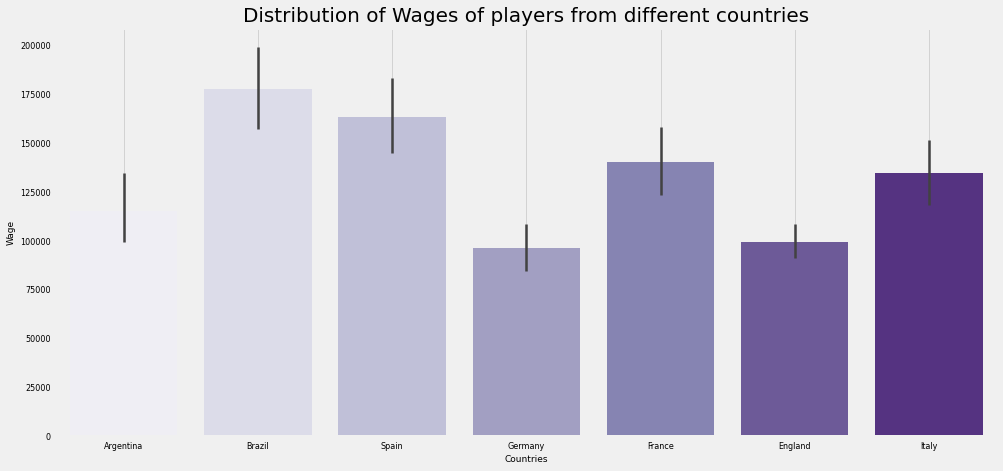

In [105]:
# Players of various Nations vs Wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
df_countries = df.loc[df['Nationality'].isin(some_countries) & df['Wage']]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df_countries['Nationality'], y=df_countries['Wage'], palette='Purples')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Wage', fontsize=9)
ax.set_title(label='Distribution of Wages of players from different countries', fontsize=20)
plt.grid()
plt.show()

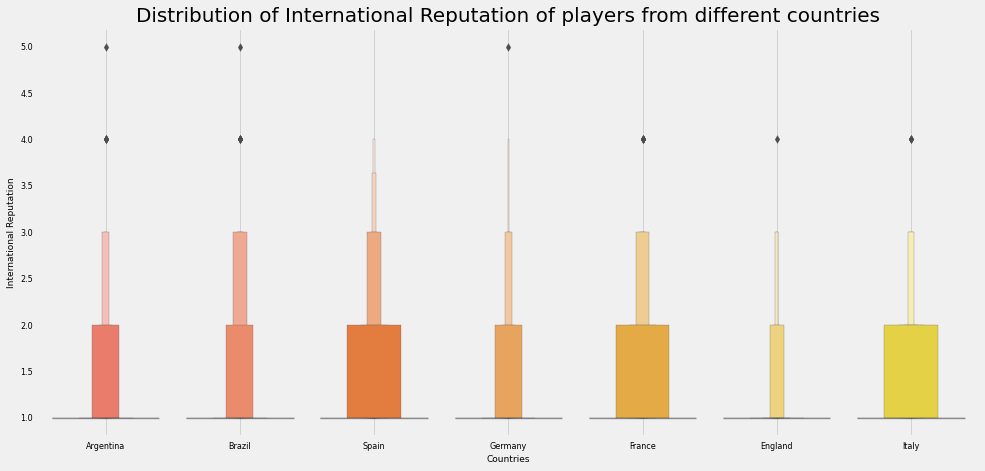

In [107]:
# Players of various Nations vs International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
df_countries = df.loc[df['Nationality'].isin(some_countries) & df['International Reputation']]

plt.figure(figsize=(15, 7))
ax = sns.boxenplot(x=df_countries['Nationality'], y=df_countries['International Reputation'], palette='autumn')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='International Reputation', fontsize=9)
ax.set_title(label='Distribution of International Reputation of players from different countries', fontsize=20)
plt.grid()
plt.show()

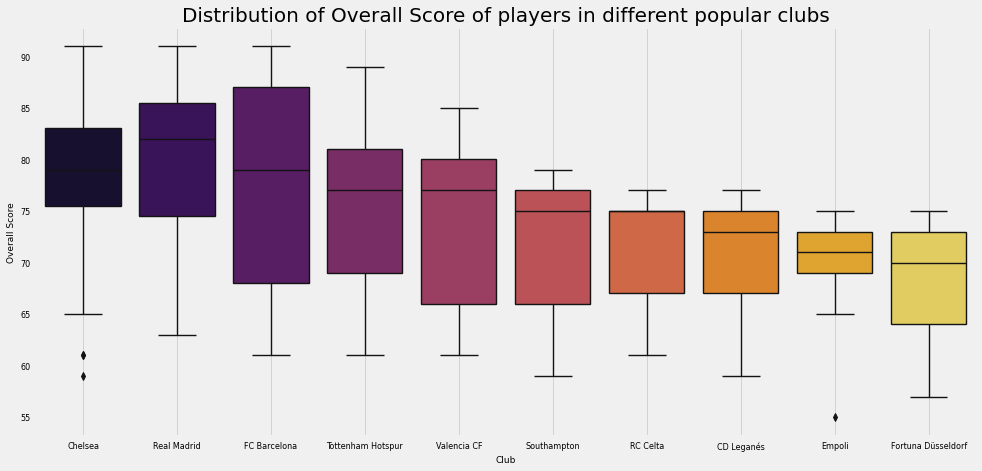

In [109]:
# Oveall Dcore vs Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

df_clubs = df.loc[df['Club'].isin(some_clubs) & df['Overall']]

plt.figure(figsize=(15, 7))
ax = sns.boxplot(x=df_clubs['Club'], y=df_clubs['Overall'], palette='inferno')
ax.set_xlabel(xlabel='Club', fontsize=9)
ax.set_ylabel(ylabel='Overall Score', fontsize=9)
ax.set_title(label='Distribution of Overall Score of players in different popular clubs', fontsize=20)
plt.grid()
plt.show()

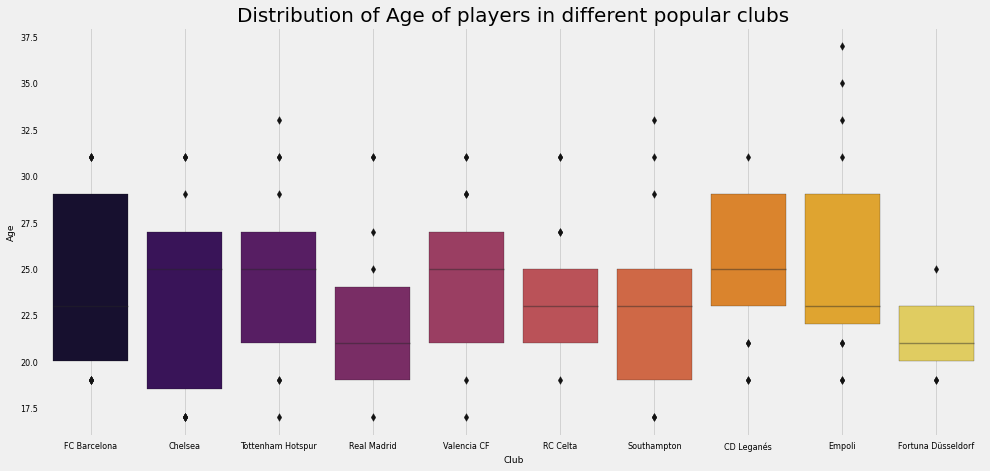

In [112]:
# Distribution of Age in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

df_clubs = df.loc[df['Club'].isin(some_clubs) & df['Age']]

plt.figure(figsize=(15, 7))
ax = sns.boxenplot(x=df_clubs['Club'], y=df_clubs['Age'], palette='inferno')
ax.set_xlabel(xlabel='Club', fontsize=9)
ax.set_ylabel(ylabel='Age', fontsize=9)
ax.set_title(label='Distribution of Age of players in different popular clubs', fontsize=20)
plt.grid()
plt.show()

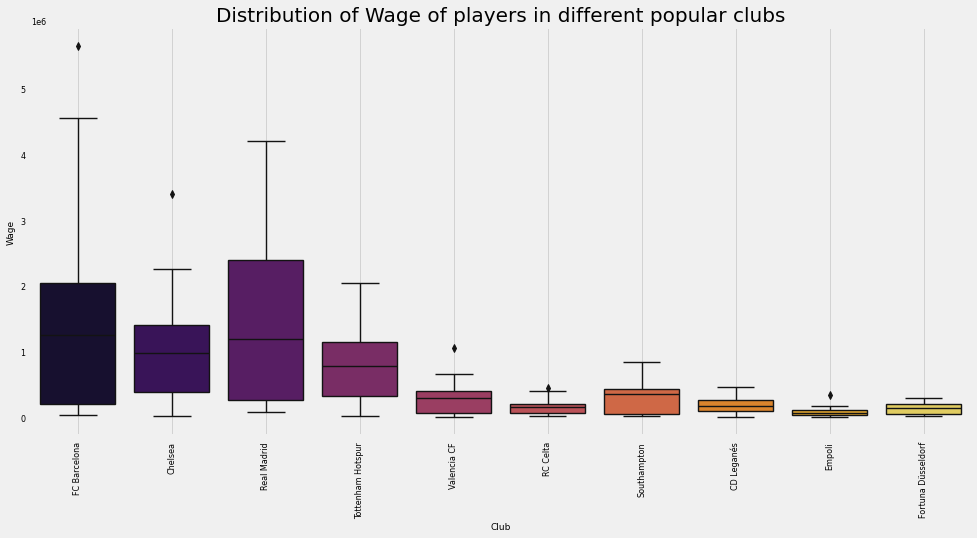

In [115]:
# Distribution of Wage in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

df_clubs = df.loc[df['Club'].isin(some_clubs) & df['Wage']]

plt.figure(figsize=(15, 7))
ax = sns.boxplot(x=df_clubs['Club'], y=df_clubs['Wage'], palette='inferno')
ax.set_xlabel(xlabel='Club', fontsize=9)
ax.set_ylabel(ylabel='Wage', fontsize=9)
ax.set_title(label='Distribution of Wage of players in different popular clubs', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

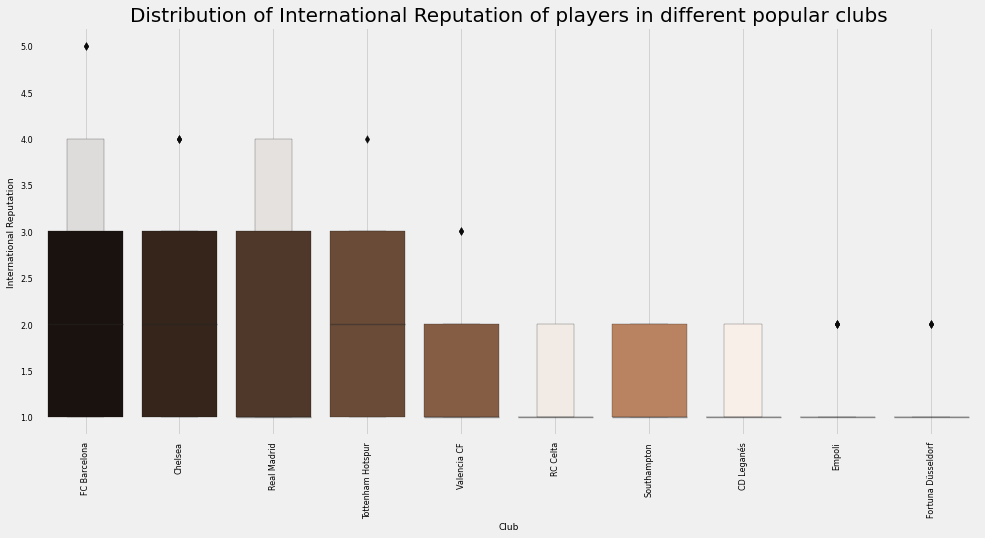

In [116]:
# Distribution of International Reputation in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

df_clubs = df.loc[df['Club'].isin(some_clubs) & df['International Reputation']]

plt.figure(figsize=(15, 7))
ax = sns.boxenplot(x=df_clubs['Club'], y=df_clubs['International Reputation'], palette='copper')
ax.set_xlabel(xlabel='Club', fontsize=9)
ax.set_ylabel(ylabel='International Reputation', fontsize=9)
ax.set_title(label='Distribution of International Reputation of players in different popular clubs', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

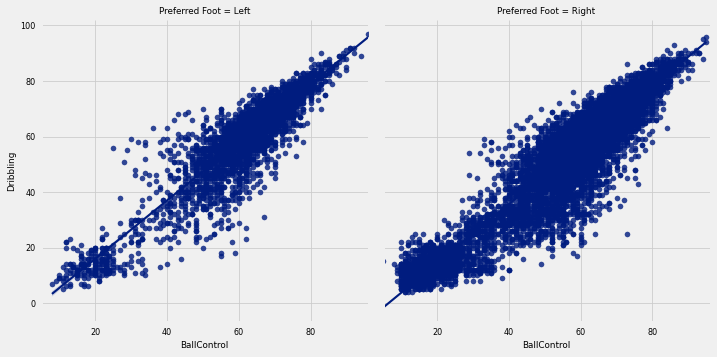

In [117]:
# Ball control vs Dribbling – Comparing performance of left footed and right footed players

sns.lmplot(x='BallControl', y='Dribbling', data=df, col='Preferred Foot')
plt.show()

### Query Analysis

In [126]:
# Best Players per each position with their age, club and nationality based on their overall scores

df.iloc[df.groupby('Position')['Overall'].idxmax()][['Position', 'Name', 
                                                     'Age', 'Club', 
                                                     'Nationality', 
                                                     'Overall']].sort_values(by='Overall', 
                                                                             ascending=False).style.background_gradient(cmap='pink')


,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [128]:
# Best Players for each skill

@interact
def skill(skills=['Defending', 'General', 'Mental', 'Passing',
                     'Mobility', 'Power', 'Rating', 'Shooting'], score=75):
    return df[df[skills]>score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by=skills,
                                                ascending=False).head(20).style.background_gradient(cmap='Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [131]:
# List of Top 15 players from each Country

@interact
def players(country=list(df['Nationality'].value_counts().index)):
    return df[df['Nationality']==country][['Name', 
            'Position', 'Overall', 
                'Potential']].sort_values(by='Overall', ascending=False).head(15).style.background_gradient(cmap='magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [135]:
df['Club'].value_counts().index

Index(['No Club', 'Real Madrid', 'AS Monaco', 'Tottenham Hotspur', 'RC Celta',
       'Southampton', 'Cardiff City', 'Borussia Dortmund', 'Manchester City',
       'Fortuna Düsseldorf',
       ...
       'América FC (Minas Gerais)', 'Santos', 'Internacional', 'Botafogo',
       'Grêmio', 'Paraná', 'Cruzeiro', 'Sligo Rovers', 'Limerick FC',
       'Derry City'],
      dtype='object', length=652)

In [133]:
# Top 15 players from each club

@interact
def clubs(club=list(df['Club'].value_counts().index[1:])):
    return df[df['Club']==club][['Name', 'Jersey Number', 'Position', 
                                'Overall', 'Nationality', 'Age', 'Wage', 
                                'Value', 'Contract Valid Until']].sort_values(by='Overall', 
                                                    ascending=False).head(15).style.background_gradient(cmap='inferno')

interactive(children=(Dropdown(description='club', options=('Real Madrid', 'AS Monaco', 'Tottenham Hotspur', '…

In [138]:
# Youngest player for FIFA 2019

youngest = df[df['Age']==df['Age'].min()][['Name', 'Age', 'Club', 'Nationality', 'Overall']]
youngest.sort_values(by='Overall', ascending=False).head().style.background_gradient(cmap='magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


In [140]:
# Eldest player for FIFA 2019

df.sort_values('Age', ascending=False)[['Name', 'Age', 'Club',
                                        'Nationality', 'Overall']].head(15).style.background_gradient(cmap='Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [154]:
# The  longest membership in the  club

now = datetime.datetime.now()
df['Join_Year'] = df.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
df['Years_of_member'] = (df.Join_Year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = df[['Name', 'Club', 'Years_of_member']].sort_values(by='Years_of_member', ascending=False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient(cmap='Reds')

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,30
M. Al Shalhoub,Al Hilal,23
H. Sogahata,Kashima Antlers,23
M. Ogasawara,Kashima Antlers,23
S. Narazaki,Nagoya Grampus,22
M. Wölfli,BSC Young Boys,21
K. Kitamoto,Vissel Kobe,21
C. Källqvist,BK Häcken,20
Y. Endo,Gamba Osaka,20


In [156]:
# Membership of players in some of the popular clubs around the world

@interact
def check(column='Years_of_member',
          club=['FC Barcelona', 'Real Madrid', 'Chelsea'], membership=4):
    return df[(df[column]>membership) & (df['Club']==club)][['Name', 
                                            'Club', 'Years_of_member']].sort_values(by='Years_of_member',
                                                                ascending=False).style.background_gradient(cmap='magma')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

In [165]:
# Defining features of players at each position

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top 4 feature for every position in football
for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration, BallControl
Position CB: Jumping, Aggression, HeadingAccuracy, Marking
Position CDM: Aggression, Jumping, Balance, BallControl
Position CF: Agility, Balance, Acceleration, Dribbling
Position CM: Balance, Agility, Acceleration, BallControl
Position GK: GKReflexes, GKDiving, GKPositioning, GKHandling
Position LAM: Agility, Balance, Acceleration, Dribbling
Position LB: Acceleration, Balance, Agility, Jumping
Position LCB: Jumping, Aggression, HeadingAccuracy, Marking
Position LCM: Balance, Agility, BallControl, LongPassing
Position LDM: Aggression, BallControl, LongPassing, Balance
Position LF: Balance, Agility, Acceleration, Dribbling
Position LM: Acceleration, Agility, Balance, Dribbling
Position LS: Acceleration, Agility, Finishing, Jumping
Position LW: Acceleration, Agility, Balance, Dribbling
Position LWB: Acceleration, Agility, Balance, Jumping
Position RAM: Agility, Balance, Acceleration, Dribbling
Position RB: Acceleration, Balance, Ju

d:\biju\python_environments\test_venv\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


In [168]:
# Top 10 left footed  footballers

df[df['Preferred Foot']=='Left'][['Name', 'Age', 
                                 'Club', 'Nationality', 
                                 'Overall']].sort_values('Overall', 
                                                         ascending=False).head(10).style.background_gradient(cmap='bone')

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


In [169]:
# Top 10 right footed  players

df[df['Preferred Foot']=='Right'][['Name', 'Age', 
                                 'Club', 'Nationality', 
                                 'Overall']].sort_values('Overall', 
                                                         ascending=False).head(10).style.background_gradient(cmap='bone')

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90


### Few Findings

1. Defending, General, Passing and Mobility have values ranging till 100. That means, we can get players having these skills very easily.
2. Most players prefer the right foot.
3. Very few players have 5-star International reputation rating.
4. Messi, Ronaldo and Neymar tops the list of 5 star rated players.
5. Most of the players have weak foot with ratings as 5. This shows most players can also shoot from their other foot than their preferred foot.
6. Most of the players play for the striker and goal keeper positons.
7. Most of the players have weight around 150 – 175 pounds.
8. There a very few players with high value. Similarly, there are very few players with high wages.
9. There are maximum players with skill moves value as 2.
10. Work rate is Medium / Medium for maximum players.
11. Maximum players have a very high potential from 65 to 75. Overall score is in the range 60 to 70 for most of the players.
12. Overall score is high and is distributed from Age 22 – 28 with preferred foot as right.
